In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# VISUALIZE NST METRICS

In [2]:
path_img_list = "../../Results/NST_metrics/image_list.csv"
img_list = pd.read_csv(path_img_list, index_col=0)
img_list.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
image_list,,,,,,,,,,,,,,
0,/home/durrmeyer/Images/StyleTransferImages/HAB...,PLANTS_cropped_3000x1000_middle_tt_resized_div...,habitat,HABITAT_images,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
1,/home/durrmeyer/Images/StyleTransferImages/HAB...,DETRITUS_cropped_3000x1000_middle_tt_resized_d...,habitat,HABITAT_images,DETRITUS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
2,/home/durrmeyer/Images/StyleTransferImages/HAB...,SAND_Eolmstedi_cropped_3000x1000_middle_tt_res...,habitat,HABITAT_images,SAND,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg


# LBP

In [3]:
path_lbp = "../../Results/NST_metrics/best_lbp.csv"
lbp_data = pd.read_csv(path_lbp, index_col=0)
lbp_data = lbp_data.merge(img_list, on="Image_path")
lbp_data.columns

Index(['normalization', 'standardization', 'image_type', 'channel_image',
       'image_resize_x', 'image_resize_y', 'Image_path', 'points_LBP',
       'radius_LBP', 'rank_lbp_value', 'value_LBP', 'count_LBP_value',
       'filename', 'type', 'folder', 'habitat', 'color_control', 'tv_loss',
       'layers', 'sex', 'fish_n', 'species', 'img_width', 'img_height',
       'image_extension'],
      dtype='object')

(2.0, 8.0)


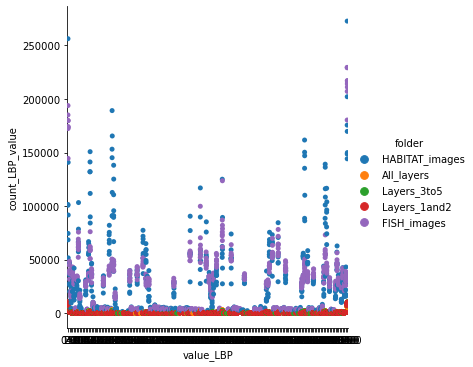

(4.0, 16.0)


KeyboardInterrupt: 

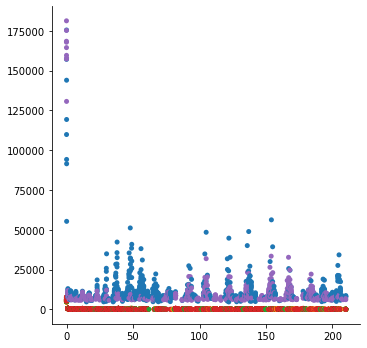

In [9]:
for params, grp in lbp_data.groupby(["radius_LBP", "points_LBP"]):
    print(params)
    sns.catplot(data=grp, x="value_LBP", y="count_LBP_value", hue="folder")
    plt.show()

In [ ]:

#plot the mean reaction per gabor filter
i=1
splitted_by_dir = merge_data.groupby([COL_DIRECTORY])
for category, split_data in splitted_by_dir:
    mean_data = split_data.groupby([COL_GABOR_ANGLES, COL_GABOR_FREQ]).agg({COL_GABOR_VALUES:np.mean})
    mean_data.reset_index(level=(0,1), inplace=True)
    map = mean_data.pivot(COL_GABOR_FREQ, COL_GABOR_ANGLES, COL_GABOR_VALUES)

    ax = plt.subplot(1,len(splitted_by_dir),i)
    ax.set_title(category)
    sns.heatmap(ax=ax, data=map, cbar=True, square=True)
    i+=1
    plt.show()

#plot the gabor filters
frequencies = merge_data[COL_GABOR_FREQ].unique()
angles = merge_data[COL_GABOR_ANGLES].unique()
f, axs = plt.subplots(len(frequencies), len(angles), squeeze=False)
for f, freq in enumerate(frequencies):
    for a, angle in enumerate(angles):
        gk = gabor_kernel(frequency=freq, theta=np.radians(angle))
        axs[f,a].imshow(gk.real)
        axs[f,a].set_title("frequency:{}, angle:{}".format(freq, angle))

plt.show()

(8.0, 2.0)


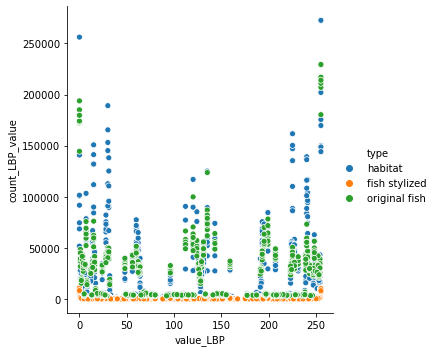

(16.0, 4.0)


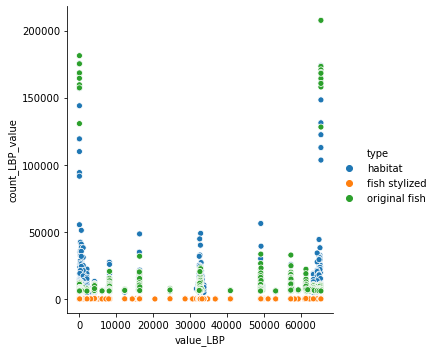

In [32]:
for params, values in lbp_data.groupby(["points_LBP","radius_LBP"]):
    print(params)
    sns.relplot(data=values, x="value_LBP", y="count_LBP_value", hue="type")
    plt.show()

# STATISTICAL MOMENTS

In [12]:
stat_path = "../../Results/NST_metrics/statistical_metrics.csv"
stat_data = pd.read_csv(stat_path, index_col=0)
stat_data = stat_data.merge(img_list, on="Image_path")
stat_data.head(3)

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,mean_stat,std_stat,skewness_stat,...,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,751.839294,46.554649,0.988085,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
1,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,759.116028,46.728863,-0.084126,...,DETRITUS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
2,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,754.493286,37.907387,0.841687,...,SAND,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg


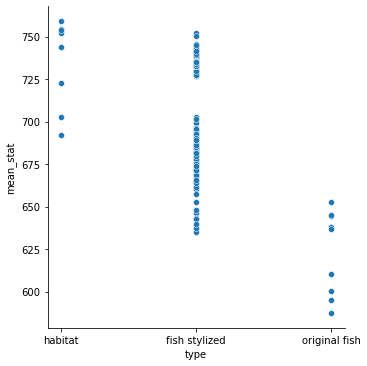

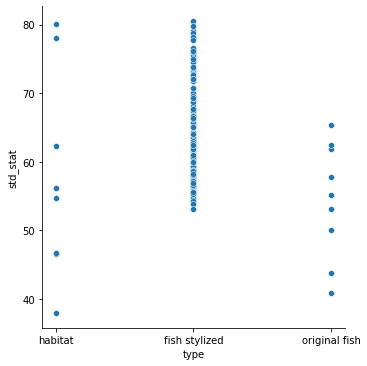

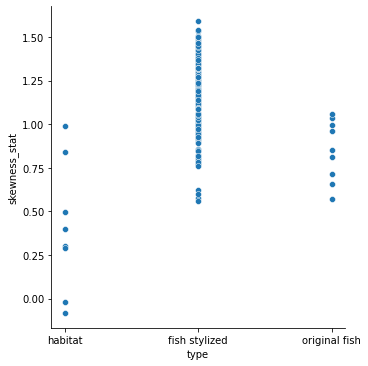

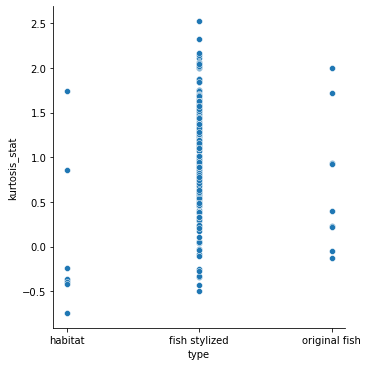

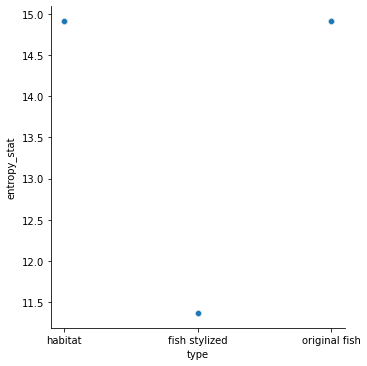

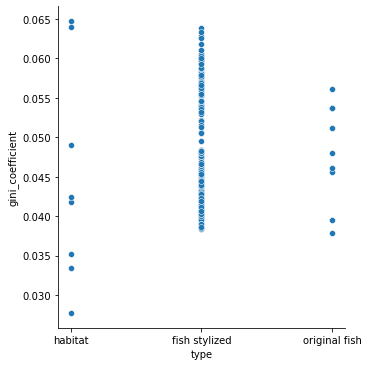

In [11]:
sns.relplot(data=stat_data, x="type", y="mean_stat")
plt.show()
sns.relplot(data=stat_data, x="type", y="std_stat")
plt.show()
sns.relplot(data=stat_data, x="type", y="skewness_stat")
plt.show()
sns.relplot(data=stat_data, x="type", y="kurtosis_stat")
plt.show()
sns.relplot(data=stat_data, x="type", y="entropy_stat")
plt.show()
sns.relplot(data=stat_data, x="type", y="gini_coefficient")
plt.show()

# COLOR RATIO

In [50]:
ratio_path = "../../Results/NST_metrics/color_ratio.csv"
ratio_data = pd.read_csv(ratio_path, index_col=0)
ratio_data = ratio_data.merge(img_list, on="Image_path")
ratio_data.head()

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,color_ratio,filename,type,...,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,False,False,DARTER,ALL,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.857268,PLANTS_cropped_3000x1000_middle_tt_resized_div...,habitat,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
1,False,False,DARTER,ALL,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.648518,DETRITUS_cropped_3000x1000_middle_tt_resized_d...,habitat,...,DETRITUS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
2,False,False,DARTER,ALL,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.794018,SAND_Eolmstedi_cropped_3000x1000_middle_tt_res...,habitat,...,SAND,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
3,False,False,DARTER,ALL,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.772390,GRAVEL_cropped_3000x1000_middle_tt_resized_div...,habitat,...,GRAVEL,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
4,False,False,DARTER,ALL,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.759810,BOULDERxSAND_Eolmstedi_cropped_3000x1000_middl...,habitat,...,BOULDERxSAND,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg


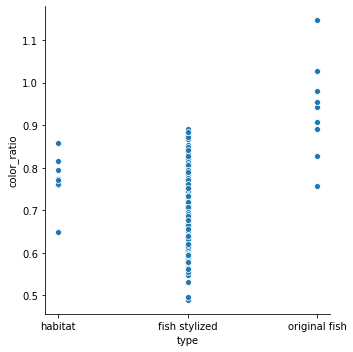

In [51]:
sns.relplot(data=ratio_data, x="type", y="color_ratio")
plt.show()

# FOURIER SLOPE

In [53]:
fft_path = "../../Results/NST_metrics/FFT_slopes.csv"
fft_data = pd.read_csv(fft_path, index_col=0)
fft_data = fft_data.merge(img_list, on="Image_path")
fft_data.head()

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,sample_idx_F,slope_sample_F,window_size_F,...,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,False,False,DARTER,GRAY,512.0,1536.0,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.0,-3.392233,512.0,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
1,False,False,DARTER,GRAY,512.0,1536.0,/home/durrmeyer/Images/StyleTransferImages/HAB...,1.0,-4.266422,512.0,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
2,False,False,DARTER,GRAY,512.0,1536.0,/home/durrmeyer/Images/StyleTransferImages/HAB...,2.0,-4.508030,512.0,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
3,False,False,DARTER,GRAY,512.0,1536.0,/home/durrmeyer/Images/StyleTransferImages/HAB...,3.0,-4.200353,512.0,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
4,False,False,DARTER,GRAY,512.0,1536.0,/home/durrmeyer/Images/StyleTransferImages/HAB...,4.0,-4.145240,512.0,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg


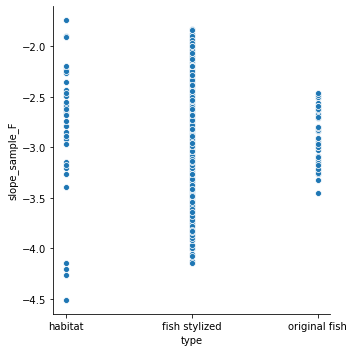

In [54]:
sns.relplot(data=fft_data, x="type", y="slope_sample_F")
plt.show()

# GABOR

In [43]:
gabor_path = "../../Results/NST_metrics/gabor.csv"
gabor_data = pd.read_csv(gabor_path, index_col=0)
gabor_data = gabor_data.merge(img_list, on="Image_path")
gabor_data.head()

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,gabor_angles,gabor_frequencies,gabor_values,...,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.0,0.2,1.078135,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
1,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.0,0.4,1.506456,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
2,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,0.0,0.8,510.619598,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
3,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,45.0,0.2,0.627811,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg
4,False,False,DARTER,GRAY,NaN,NaN,/home/durrmeyer/Images/StyleTransferImages/HAB...,45.0,0.4,1.107163,...,PLANTS,NaN,NaN,NaN,NaN,NaN,NaN,3000,1000,.jpg


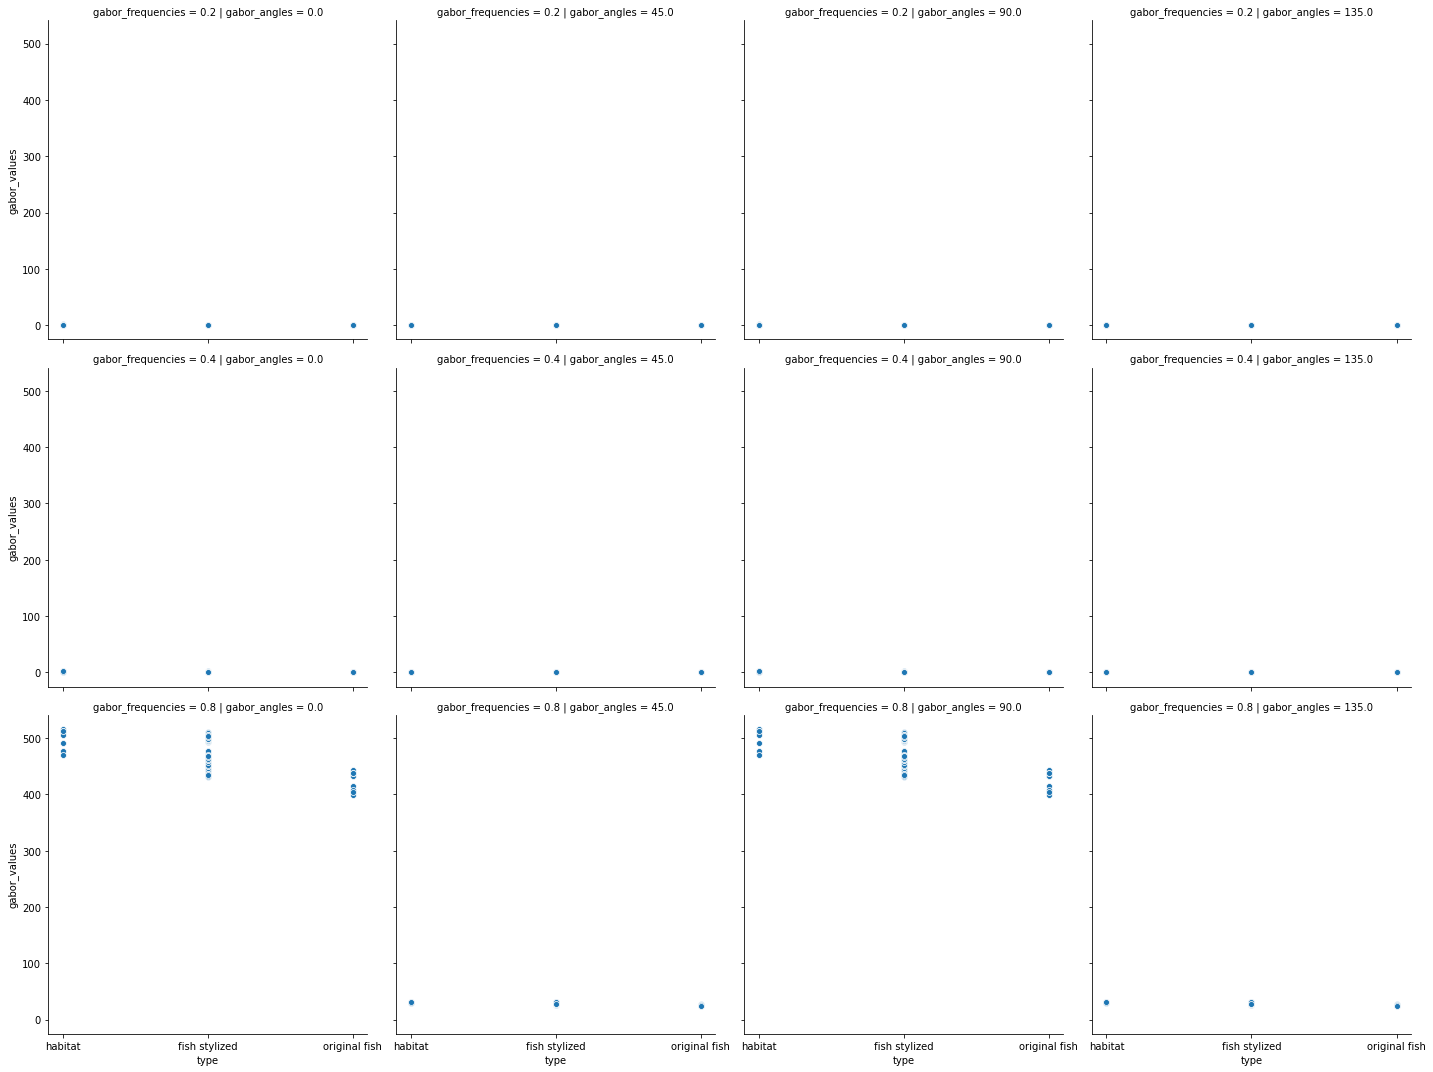

In [55]:
sns.relplot(data=gabor_data, x="type", y="gabor_values", row="gabor_frequencies", col="gabor_angles")
plt.show()

# GLCM HARALICK DESCRIPTORS

In [58]:
haralick_path = "../../Results/NST_metrics/haralick.csv"
haralick_data = pd.read_csv(haralick_path, index_col=0)
haralick_data = haralick_data.merge(img_list, on="Image_path")
haralick_data.columns

Index(['normalization', 'standardization', 'image_type', 'channel_image',
       'image_resize_x', 'image_resize_y', 'Image_path', 'GLCM_angle',
       'GLCM_dist', 'GLCM_mean', 'GLCM_variance', 'GLCM_correlation',
       'GLCM_contrast', 'GLCM_dissimilarity', 'GLCM_homogeneity', 'GLCM_ASM',
       'GLCM_energy', 'GLCM_max_proba', 'GLCM_entropy', 'filename', 'type',
       'folder', 'habitat', 'color_control', 'tv_loss', 'layers', 'sex',
       'fish_n', 'species', 'img_width', 'img_height', 'image_extension'],
      dtype='object')

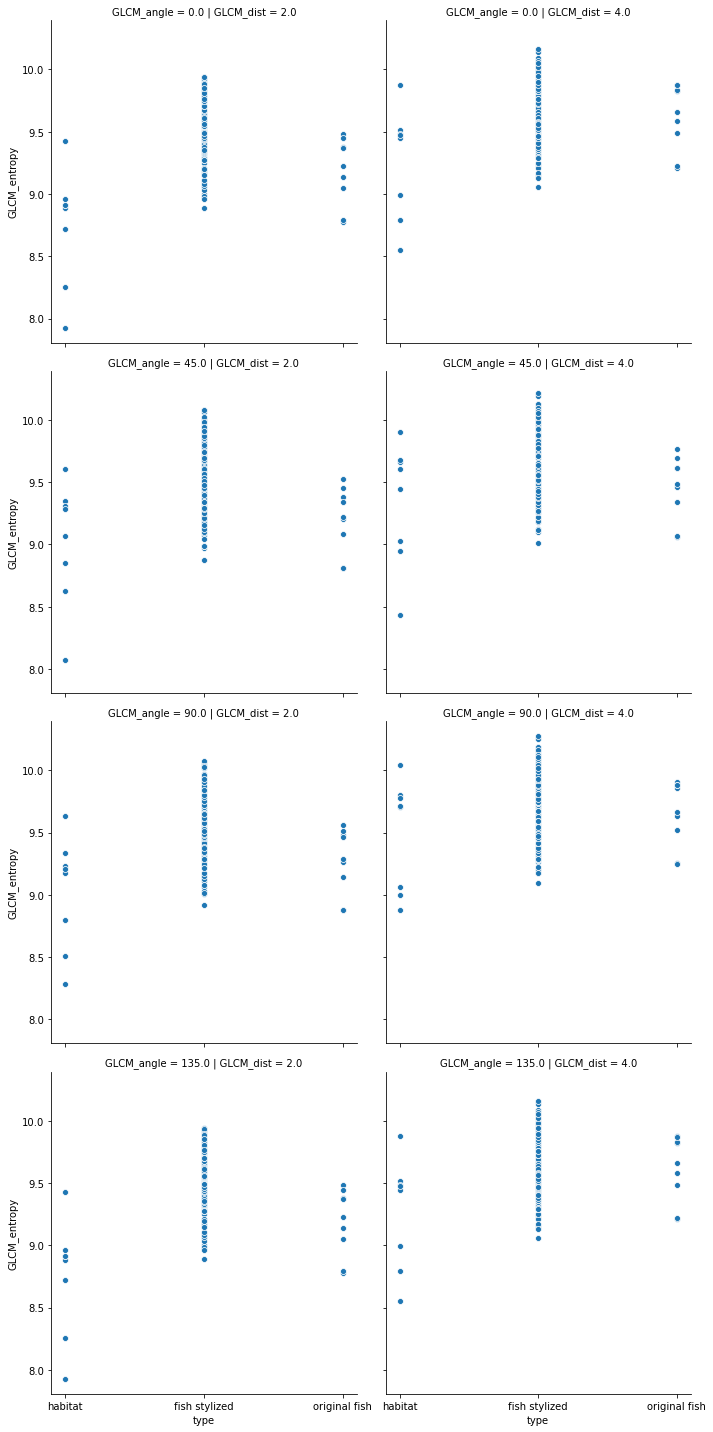

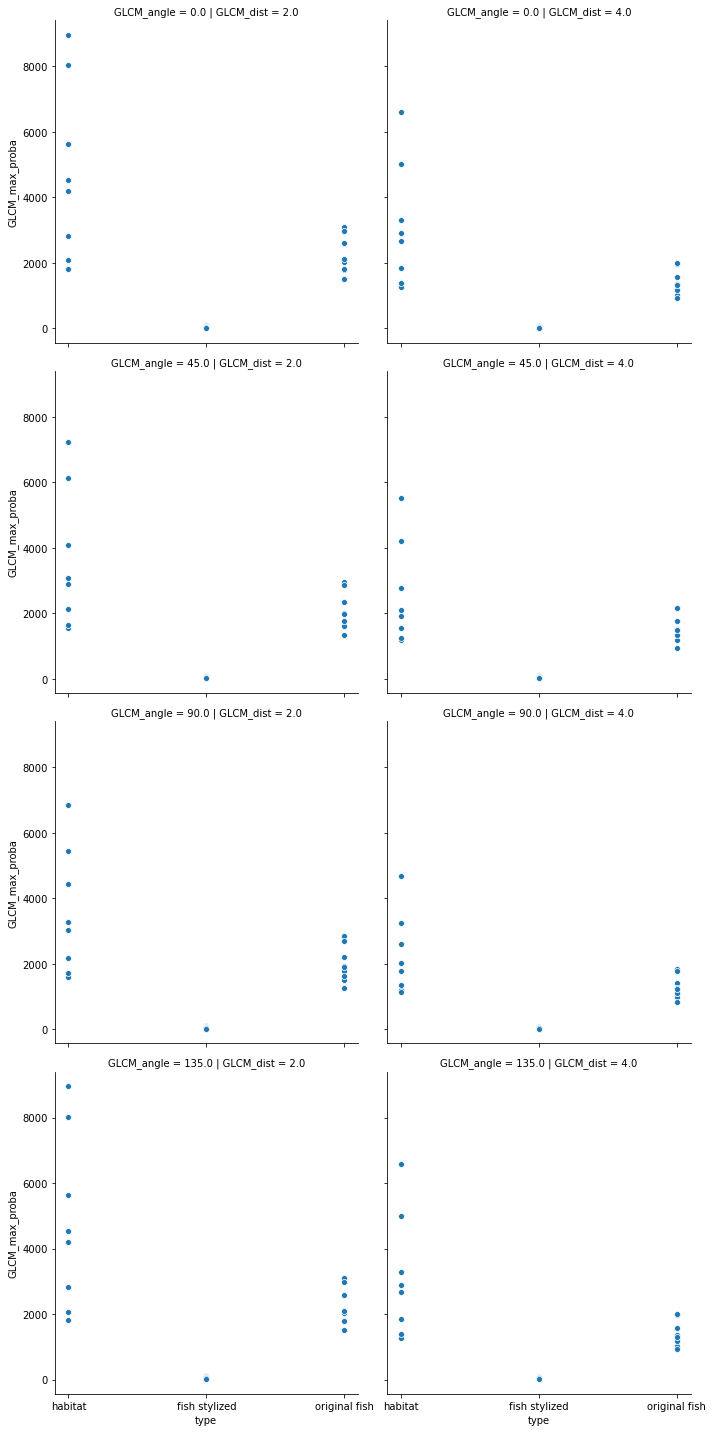

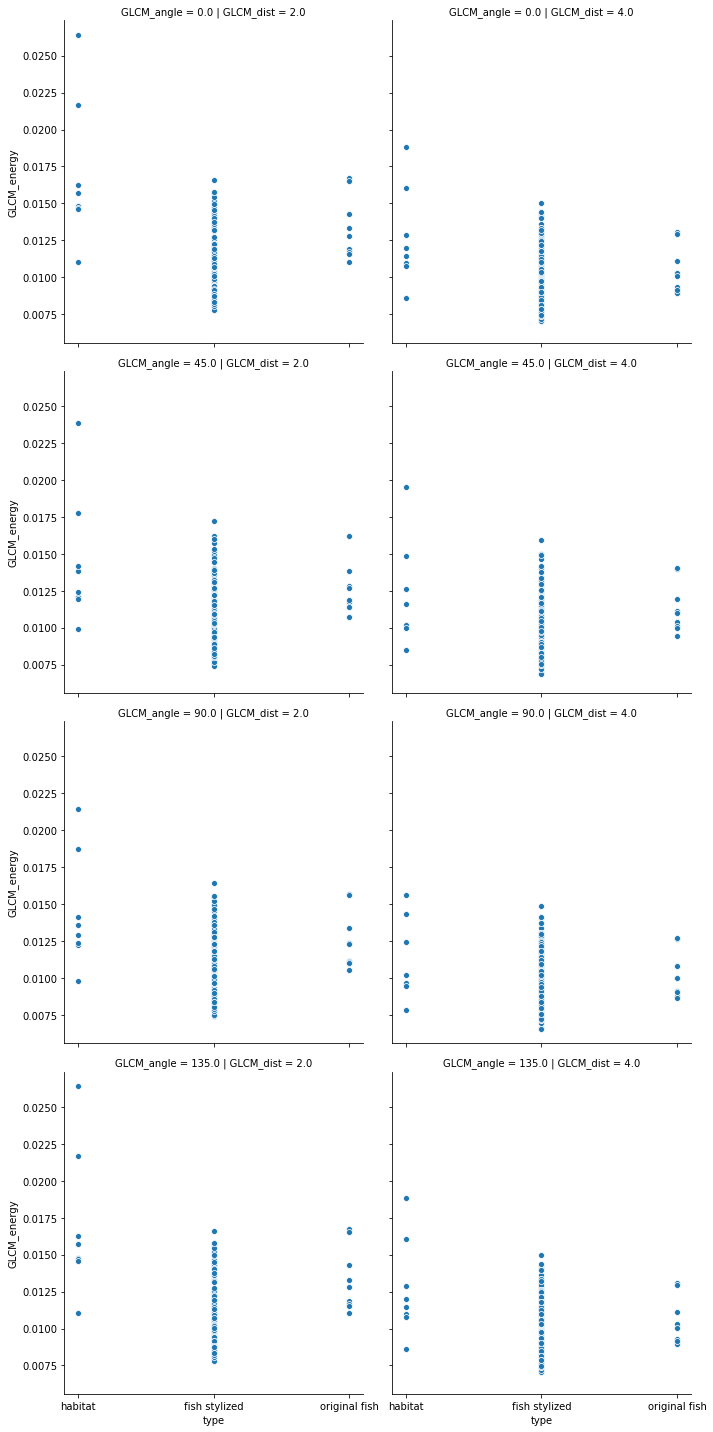

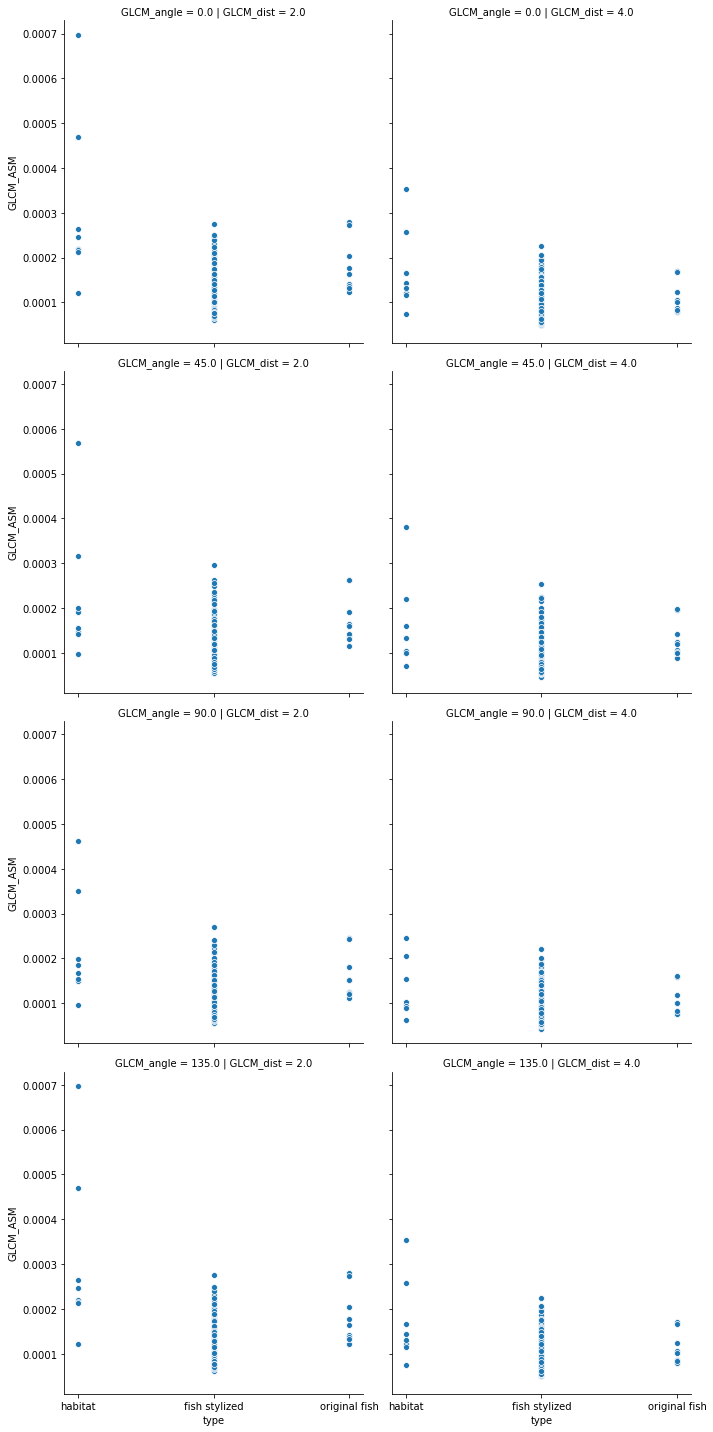

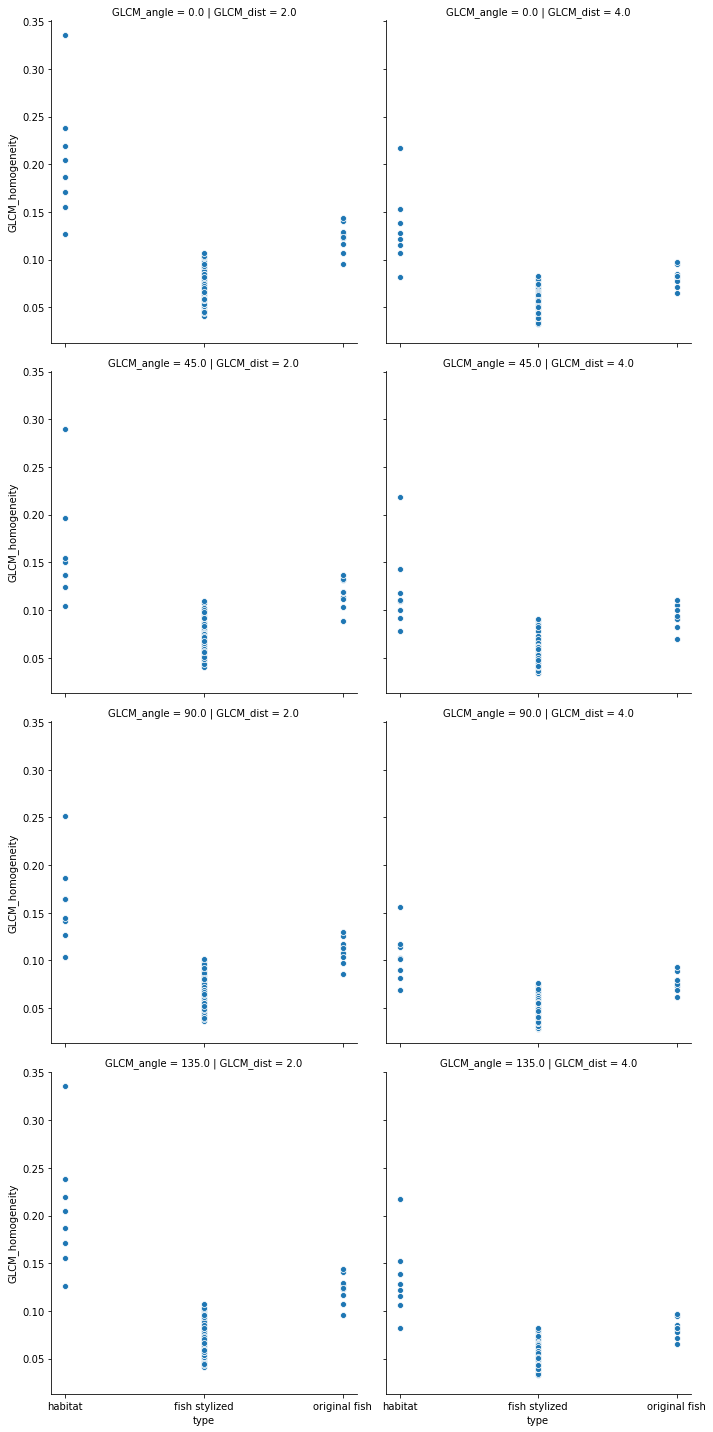

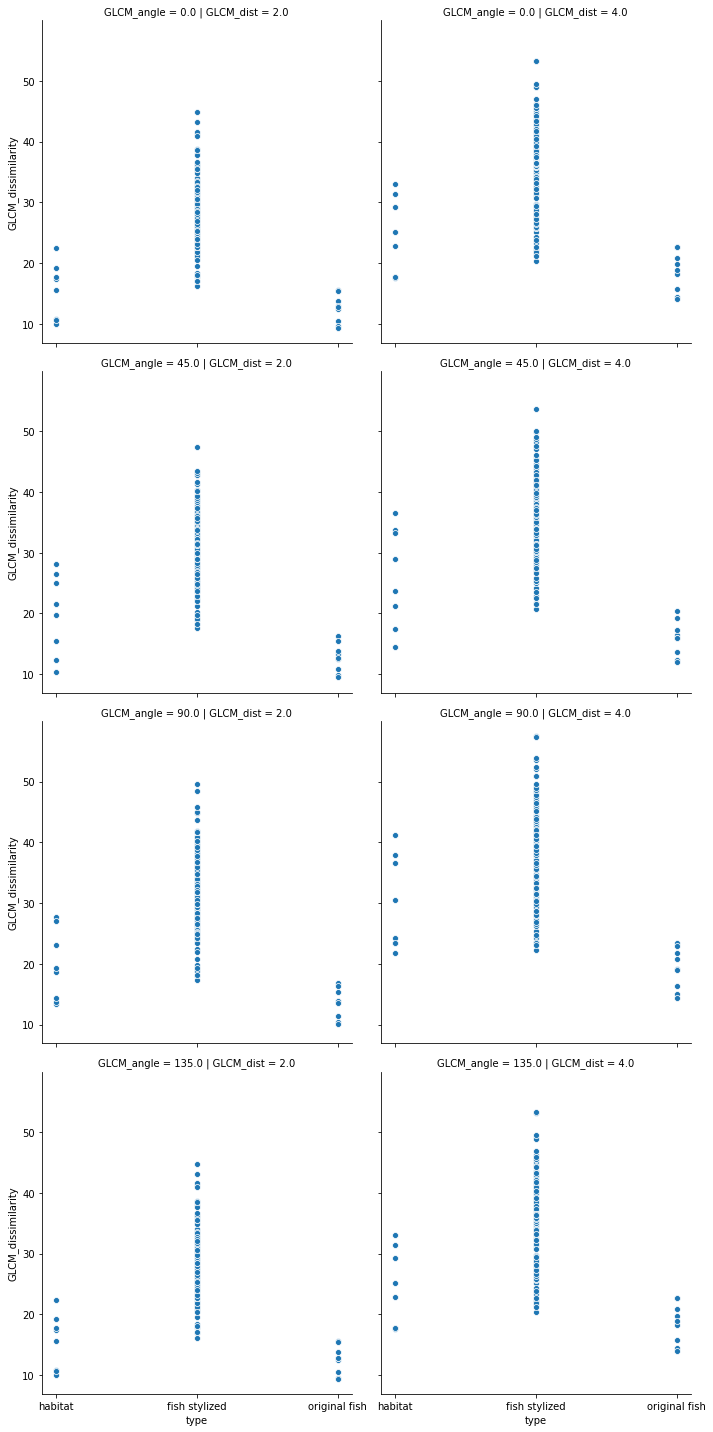

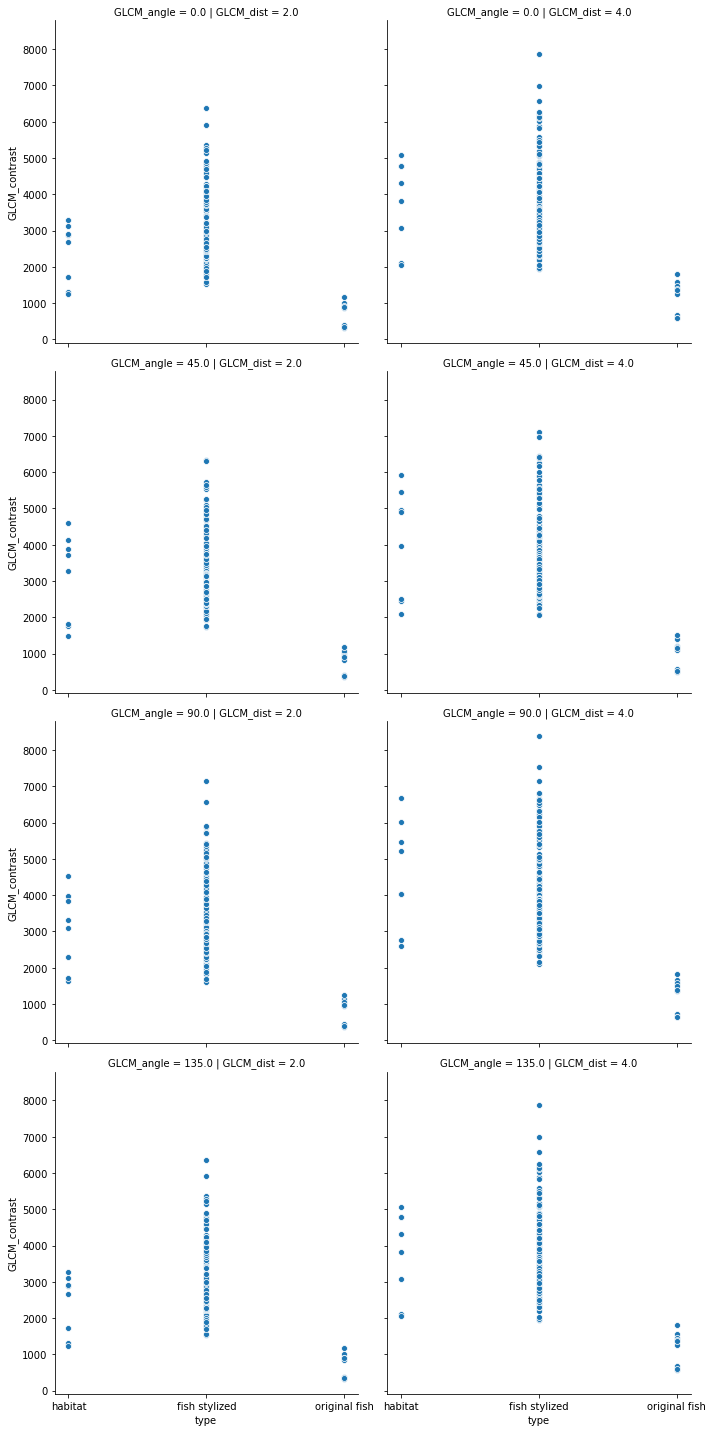

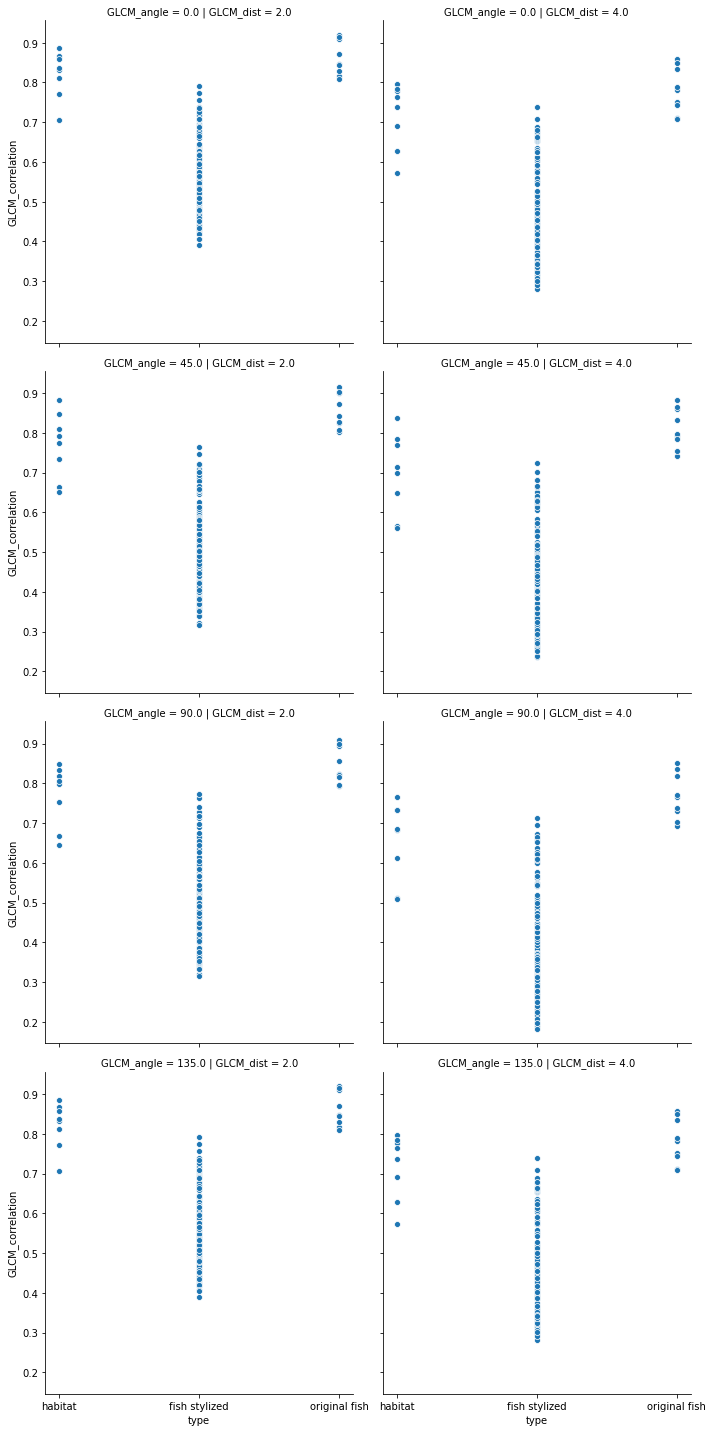

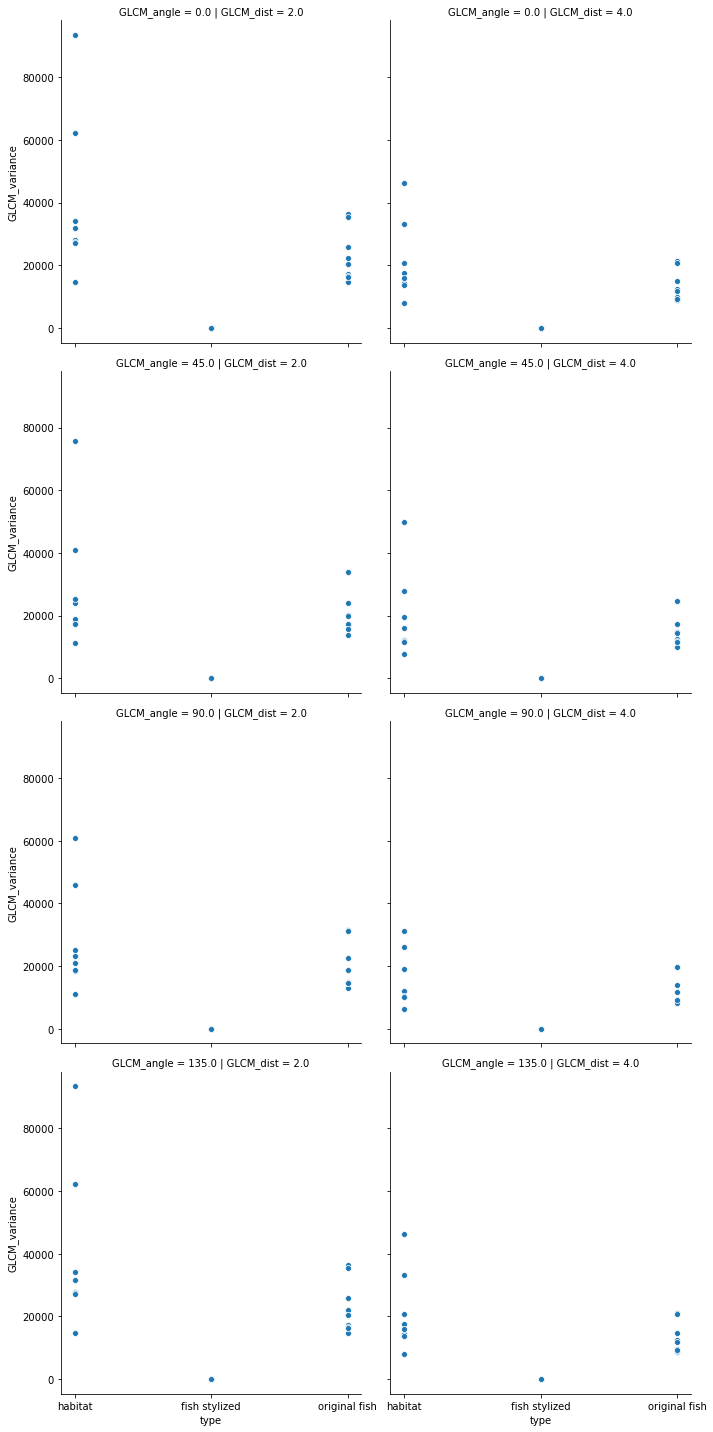

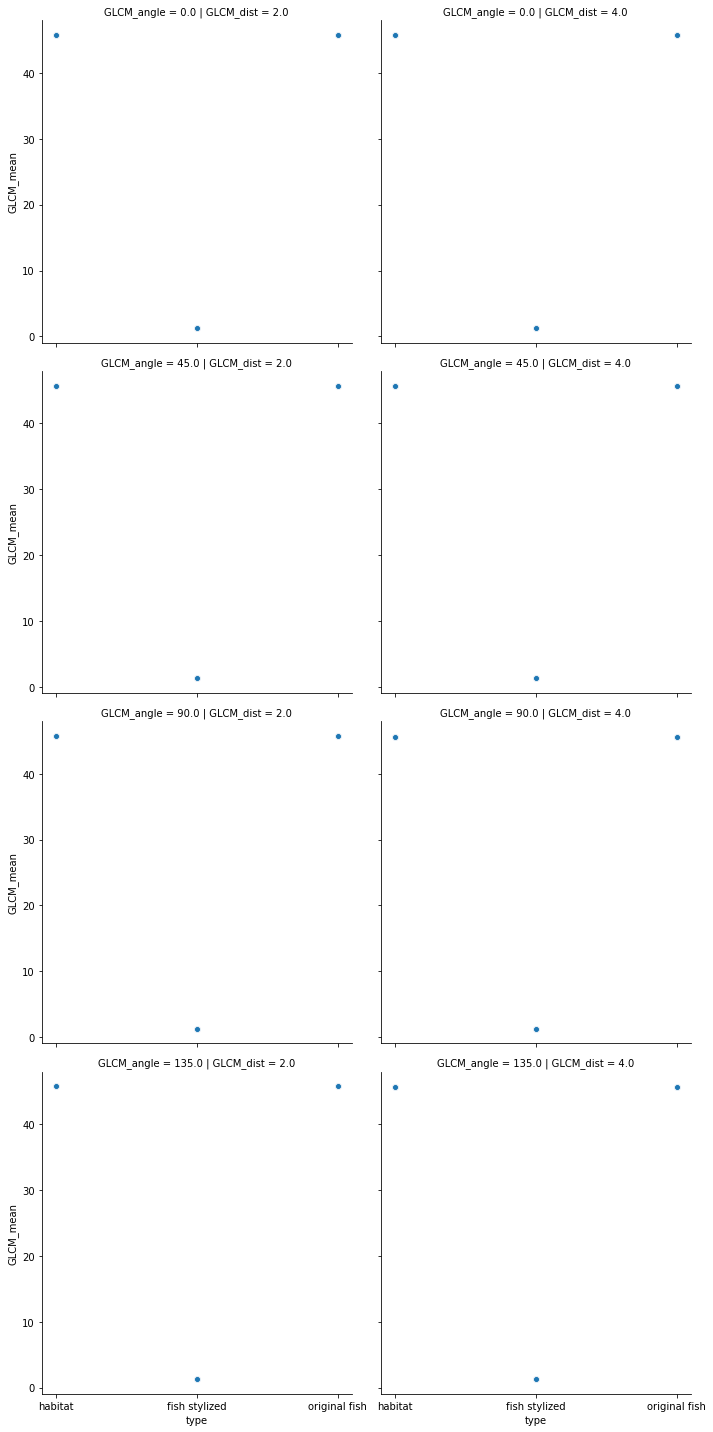

In [60]:
sns.relplot(data=haralick_data, x="type", y="GLCM_entropy", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_max_proba", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_energy", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_ASM", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_homogeneity", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_dissimilarity", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_contrast", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_correlation", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_variance", row="GLCM_angle", col="GLCM_dist")
plt.show()
sns.relplot(data=haralick_data, x="type", y="GLCM_mean", row="GLCM_angle", col="GLCM_dist")
plt.show()

# DEEP FEATURES

In [68]:
df_path = "../../Results/NST_metrics/deep_features.csv"
df_data = pd.read_csv(df_path, index_col=0)
df_data = df_data.merge(img_list, on="Image_path")
df_data.columns

Index(['normalization', 'standardization', 'image_type', 'channel_image',
       'image_resize_x', 'image_resize_y', 'Image_path',
       'model_name_deep_features', 'gini_deep_features', 'layer_deep_feature',
       'deep_feature_entropy', 'deep_feature_kurtosis', 'filename', 'type',
       'folder', 'habitat', 'color_control', 'tv_loss', 'layers', 'sex',
       'fish_n', 'species', 'img_width', 'img_height', 'image_extension'],
      dtype='object')

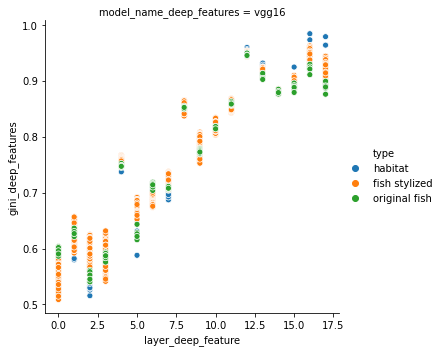

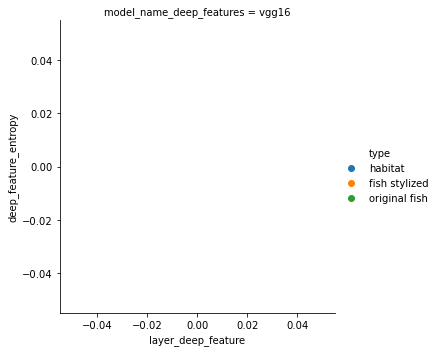

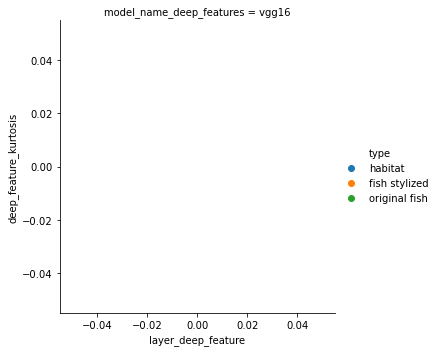

In [65]:
sns.relplot(data=df_data, x="layer_deep_feature", y="gini_deep_features", hue="type", col="model_name_deep_features")
plt.show()
sns.relplot(data=df_data, x="layer_deep_feature", y="deep_feature_entropy", hue="type", col="model_name_deep_features")
plt.show()
sns.relplot(data=df_data, x="layer_deep_feature", y="deep_feature_kurtosis", hue="type", col="model_name_deep_features")
plt.show()